In [99]:
import pandas as pd
import seaborn as sns 

In [101]:
df=pd.read_csv('BlackFriday.csv')

In [103]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.shape

(537577, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## Handling the null values 

In [19]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [105]:
## I can delete all rows or these columns so ,here we apply delete the columns 
del df['Product_Category_3']
del df['Product_Category_2']

In [107]:
df.shape

(537577, 10)

In [20]:
df['User_ID']

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
537572    1004737
537573    1004737
537574    1004737
537575    1004737
537576    1004737
Name: User_ID, Length: 537577, dtype: int64

## Anaylzing the Columns

In [24]:
df['User_ID'].nunique()

5891

In [28]:
df['Product_ID'].nunique()

3623

In [30]:
df['Gender'].nunique()

2

In [34]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [40]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [46]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [50]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [54]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [13]:
df['Purchase'].sum()/len(df['Purchase'])
#it means which shows that puchasing of per custome on one product

9333.859852635065

In [76]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [15]:
for col in df.columns:
    print(col,":",df[col].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analyzing the Gender

In [108]:
data=pd.DataFrame(df['Gender'].value_counts())

In [110]:
data

,count
Gender,
M,405380
F,132197


array([<Axes: ylabel='count'>], dtype=object)

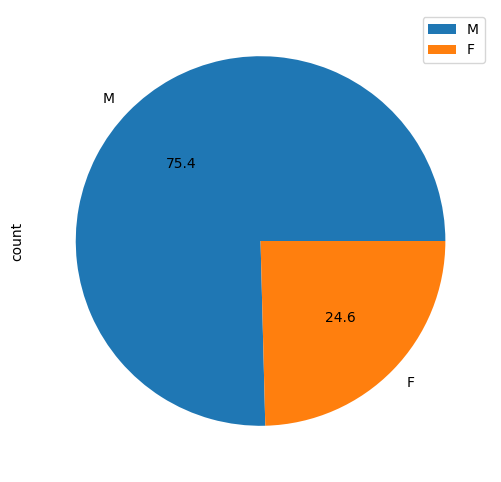

In [122]:
data.plot(kind="pie",subplots=True,figsize=(6,6),autopct="%.1f")

In [17]:
df.groupby(df['Gender']).size()

Gender
F    132197
M    405380
dtype: int64

<Axes: >

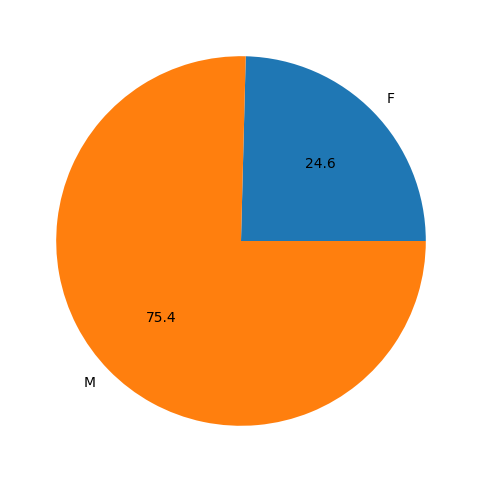

In [19]:
df.groupby(df['Gender']).size().plot(kind="pie",autopct='%.1f',figsize=(6,6))

<Axes: xlabel='Gender'>

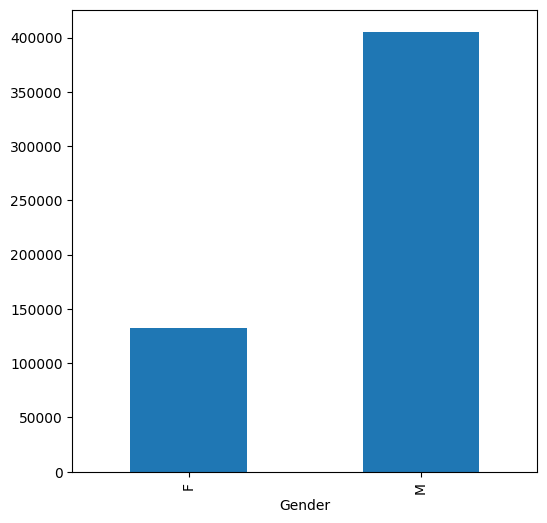

In [21]:
df.groupby(df['Gender']).size().plot(kind="bar",figsize=(6,6))

<Axes: ylabel='Purchase'>

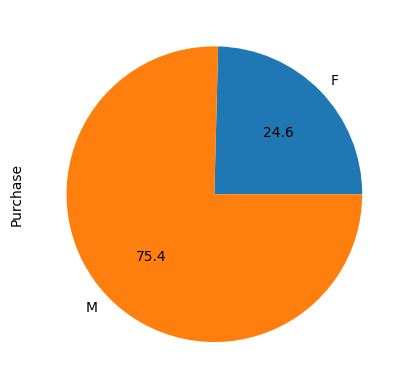

In [38]:
# df.groupby(df['Gender']).size().sum()['Purchase'].plot(kind="pie")
df.groupby('Gender')['Purchase'].count().plot(kind="pie",autopct="%.1f")

<Axes: ylabel='Purchase'>

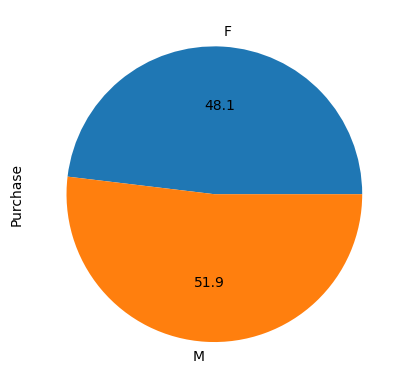

In [40]:
df.groupby('Gender')['Purchase'].mean().plot(kind="pie",autopct="%.1f")

## Anaylzsing Age & Martial Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

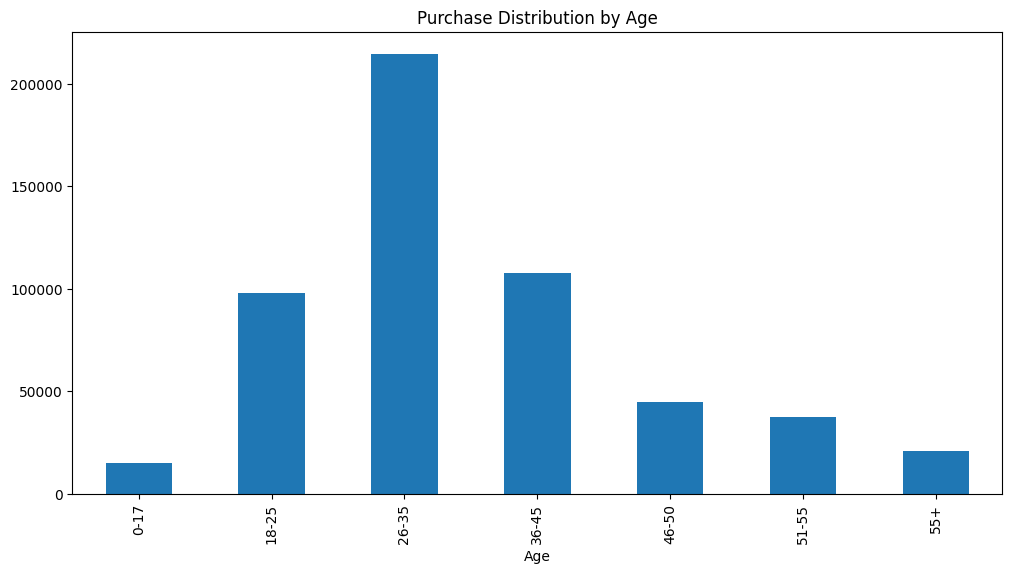

In [61]:
df.groupby('Age').size().plot(kind="bar",figsize=(12,6),title="Purchase Distribution by Age")

In [101]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products'])

In [84]:
df['Age'].value_counts()

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

In [103]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: >

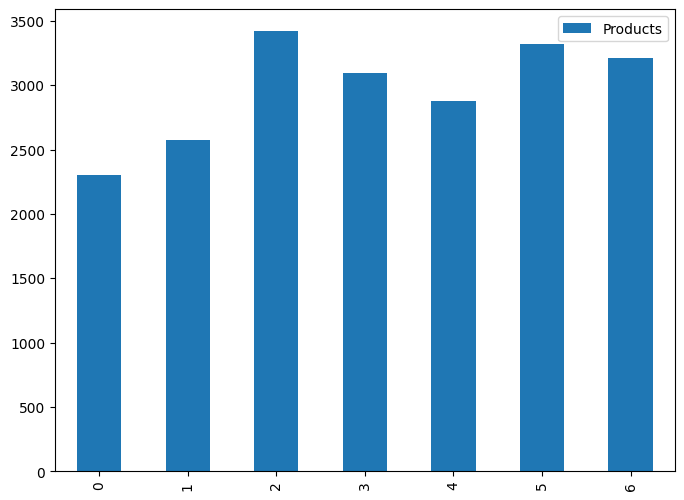

In [107]:
data.plot(kind="bar",figsize=(8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

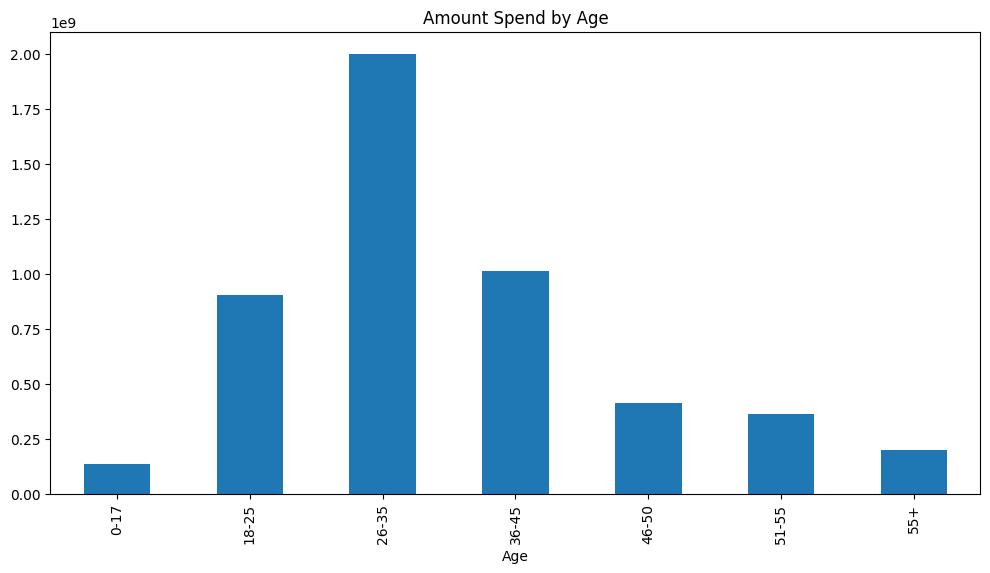

In [139]:
df.groupby('Age').sum()['Purchase'].plot(kind="bar",figsize=(12,6),title="Amount Spend by Age")

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

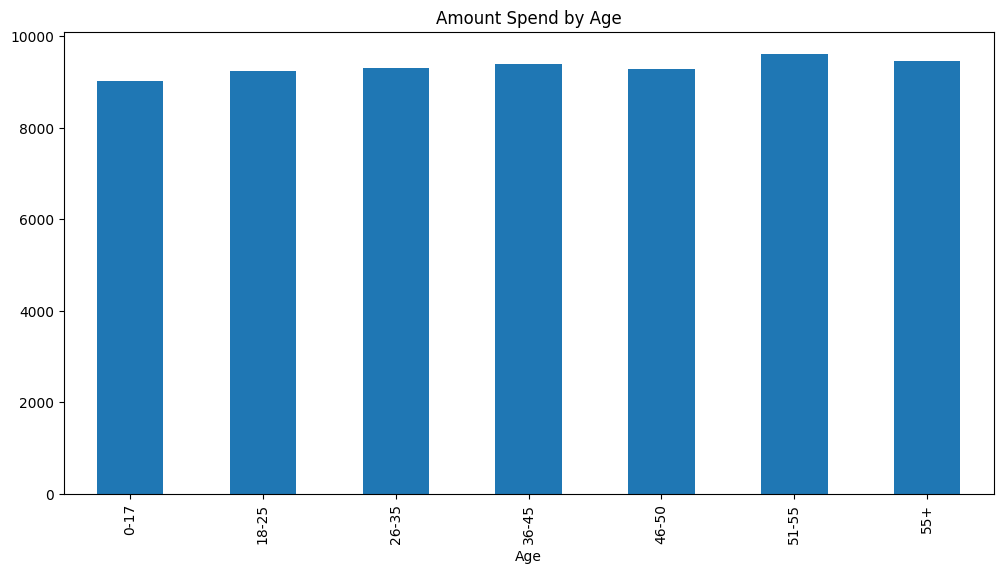

In [125]:
df.groupby('Age')['Purchase'].mean().plot(kind="bar",figsize=(12,6),title="Amount Spend by Age")

<Axes: ylabel='Purchase'>

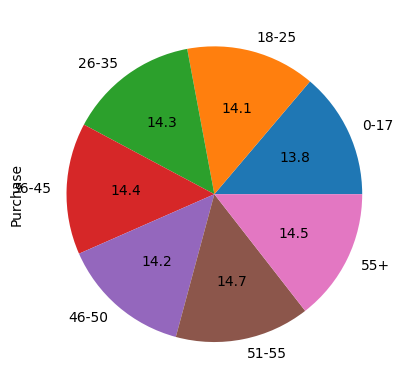

In [129]:
df.groupby('Age')['Purchase'].mean().plot(kind="pie",autopct="%0.1f")

<Axes: ylabel='Purchase'>

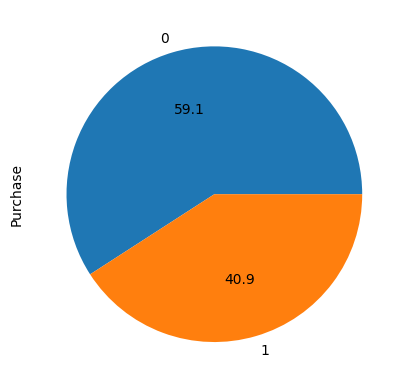

In [135]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind="pie",autopct="%0.1f")

<Axes: ylabel='Purchase'>

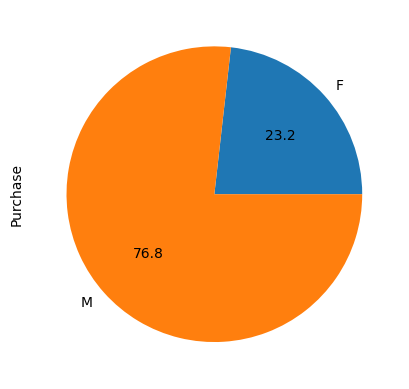

In [137]:
df.groupby('Gender')['Purchase'].sum().plot(kind="pie",autopct="%0.1f")

## Multiple columns anaylze

In [141]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

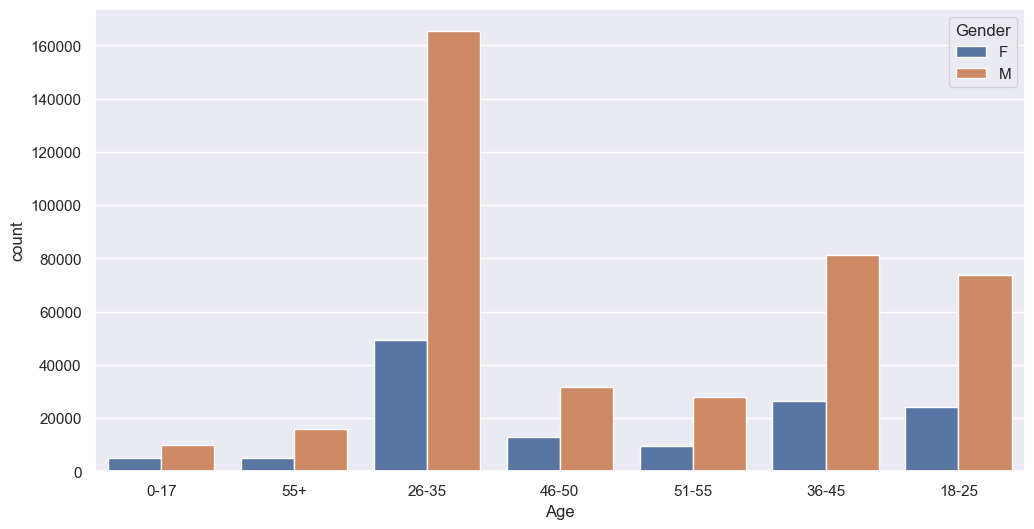

In [146]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

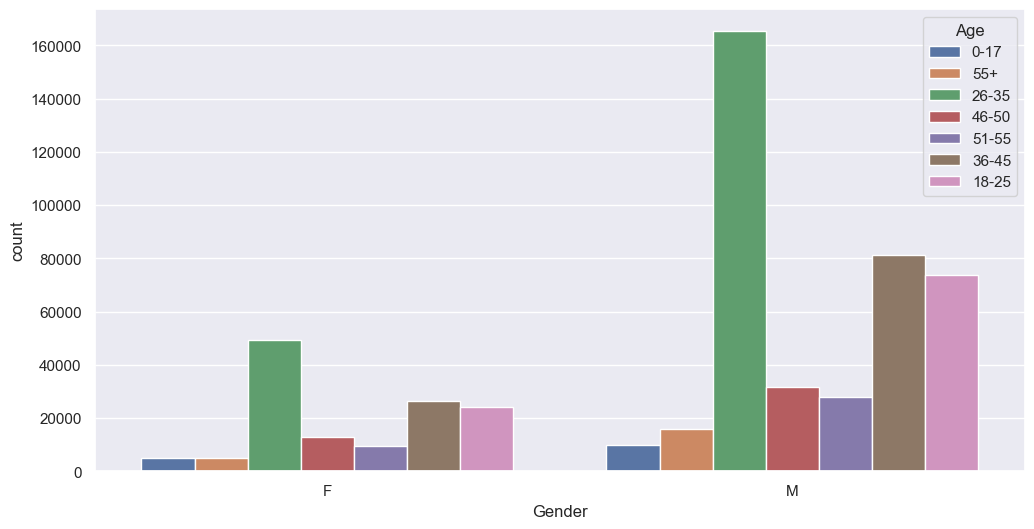

In [148]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Gender', ylabel='count'>

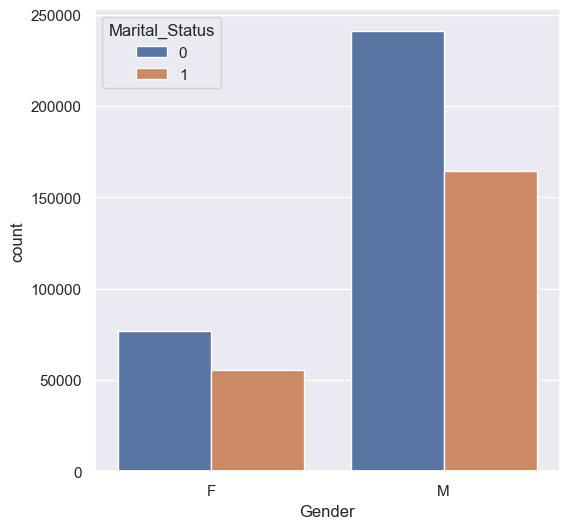

In [158]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

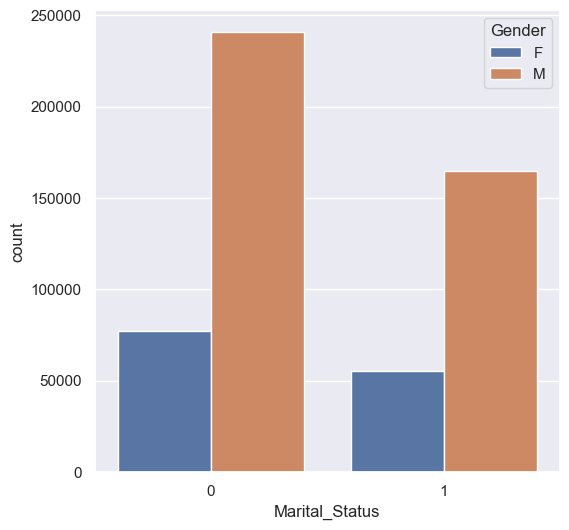

In [160]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

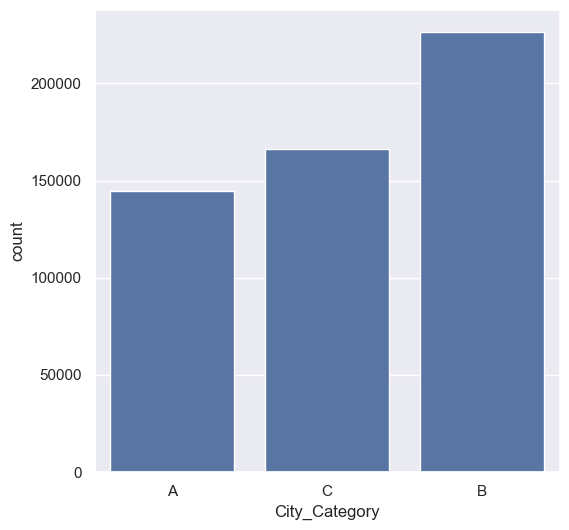

In [162]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

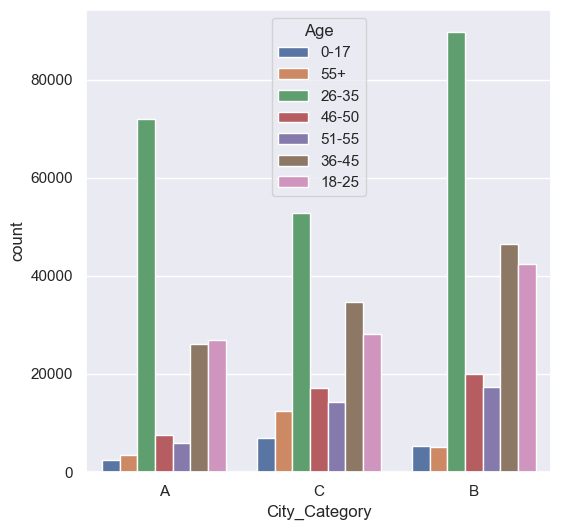

In [182]:
sns.countplot(x=df['City_Category'],hue='Age',data=df)

<Axes: xlabel='Age', ylabel='count'>

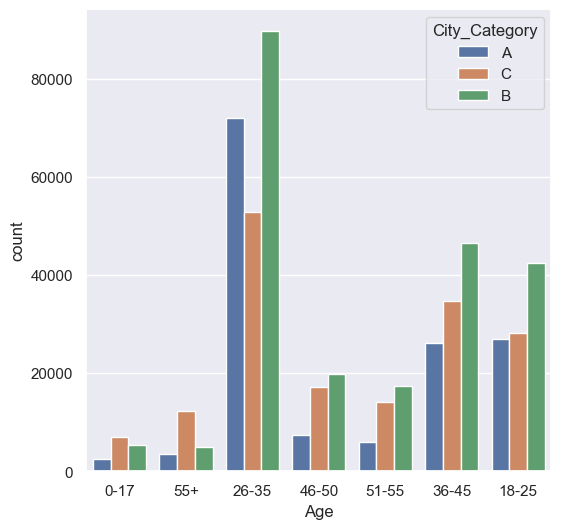

In [184]:
sns.countplot(x='Age',hue=df['City_Category'],data=df)

<Axes: xlabel='City_Category', ylabel='count'>

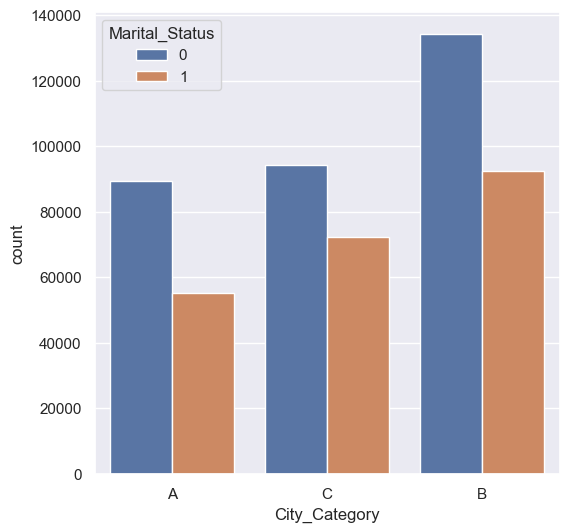

In [190]:
sns.countplot(x=df['City_Category'],hue=df['Marital_Status'],data=df)

In [ ]:
sns.countplot(x=df['City_Category'],hue=df['Gender'],data=df)

<Axes: xlabel='City_Category', ylabel='count'>

C:\Users\Yash\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Yash\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


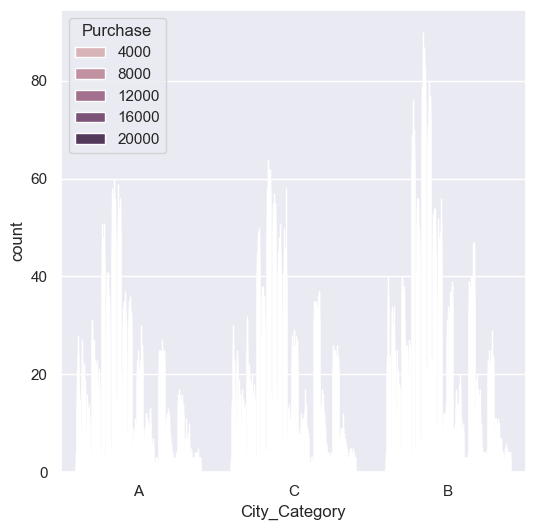

In [194]:
sns.countplot(x=df['City_Category'],hue=df['Purchase'],data=df)

<Axes: >

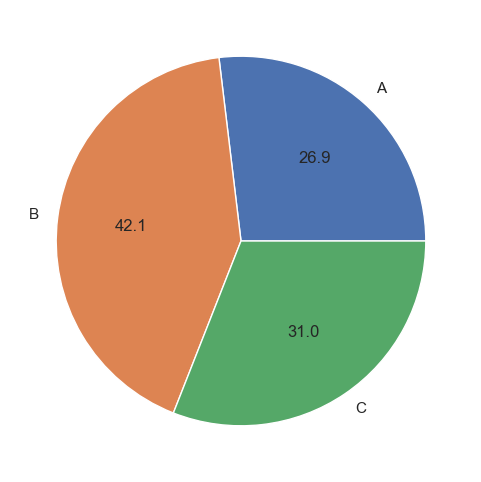

In [174]:
df.groupby('City_Category').size().plot(kind="pie",autopct="%0.1f")

In [ ]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%0.1f')

## Occupation and product Anaylsis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

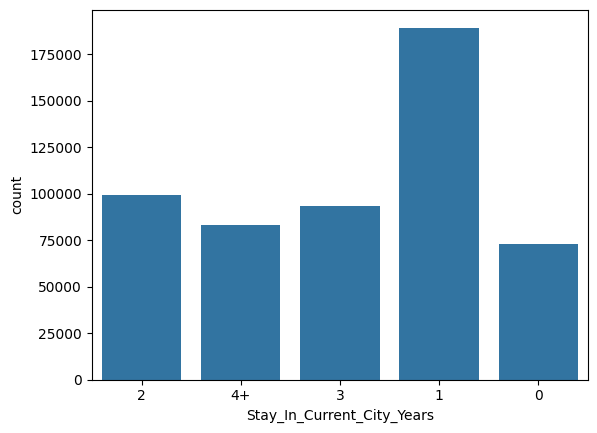

In [25]:
sns.countplot(x=df['Stay_In_Current_City_Years'],data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

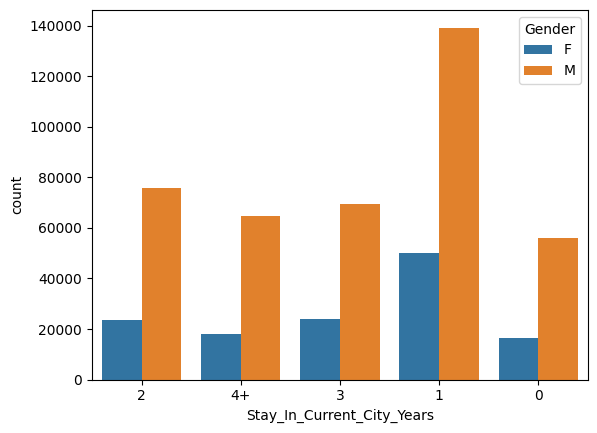

In [19]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

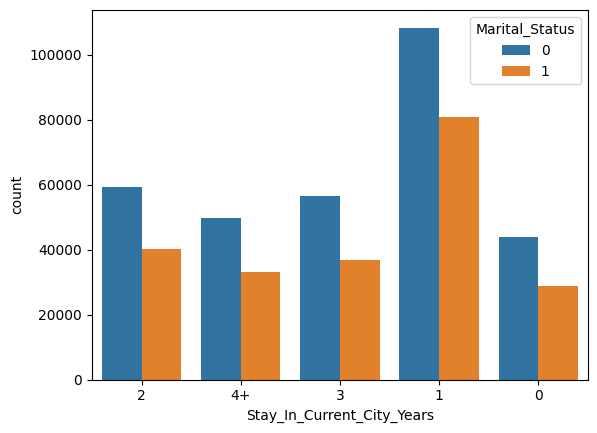

In [21]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

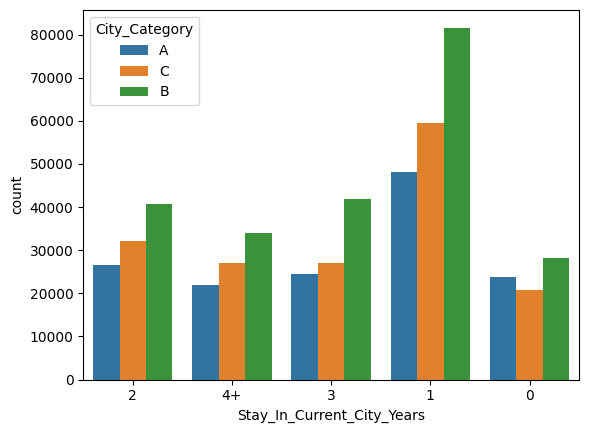

In [23]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['City_Category'],data=df)

<Axes: xlabel='City_Category', ylabel='count'>

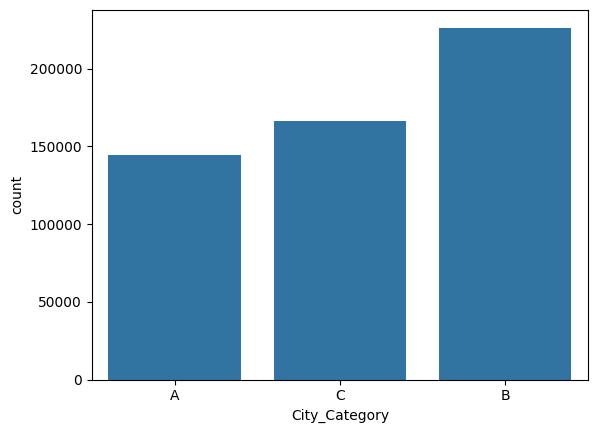

In [25]:
sns.countplot(x=df['City_Category'],data=df)

<Axes: xlabel='Age', ylabel='count'>

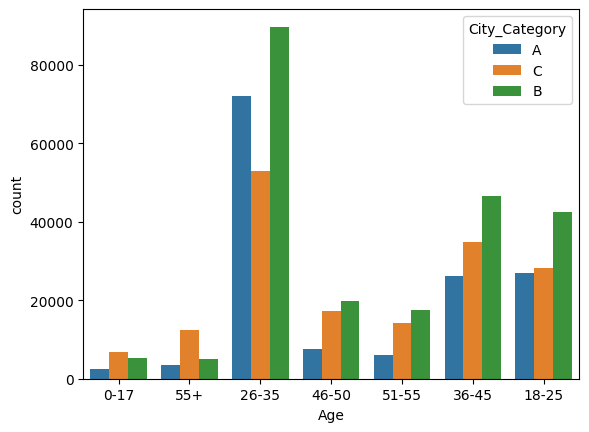

In [27]:
sns.countplot(x=df['Age'],hue=df['City_Category'],data=df)

<Axes: >

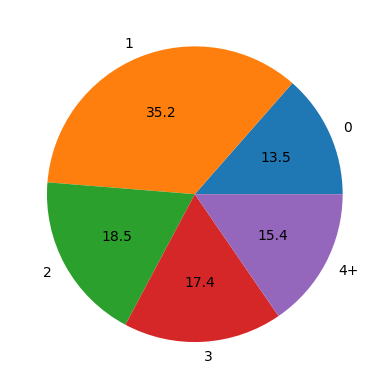

In [29]:
df.groupby(df['Stay_In_Current_City_Years']).size().plot(kind="pie",autopct="%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years'>

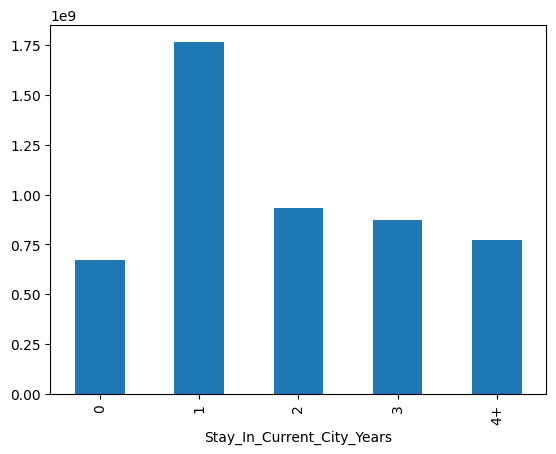

In [27]:
df.groupby(df['Stay_In_Current_City_Years']).sum()['Purchase'].plot(kind="bar")

In [ ]:
df.groupby(df['Stay_In_Current_City_Years']).sum()['Purchase'].plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

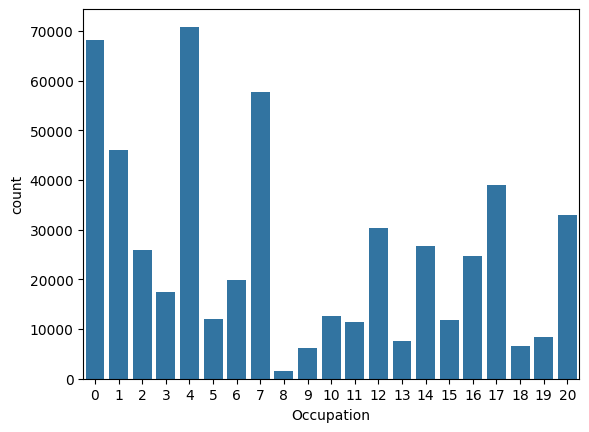

In [28]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

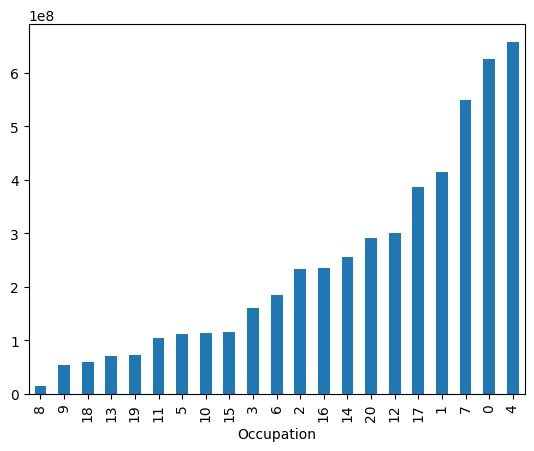

In [45]:
df.groupby(df['Occupation'])['Purchase'].sum().sort_values().plot(kind="bar")

<Axes: xlabel='Occupation'>

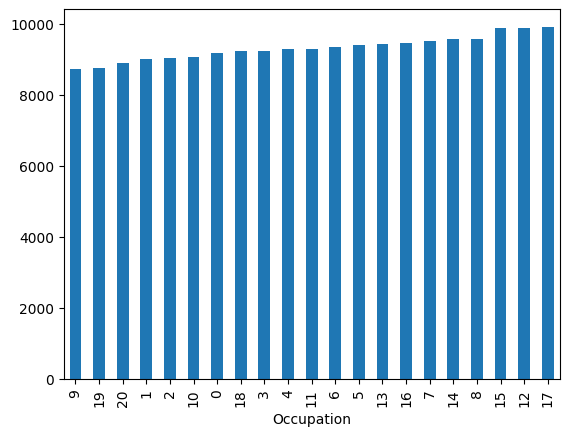

In [41]:
df.groupby(df['Occupation'])['Purchase'].mean().sort_values().plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

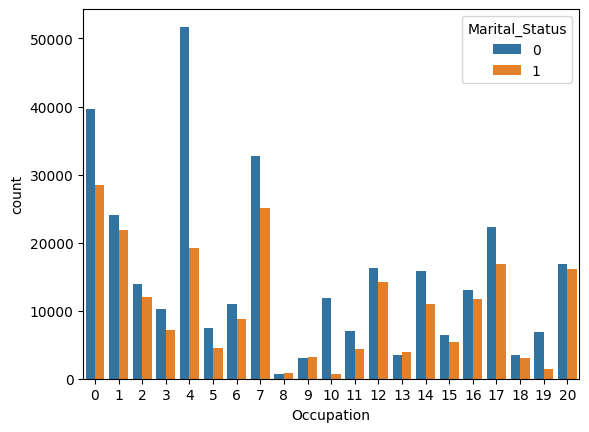

In [47]:
sns.countplot(x=df['Occupation'],hue="Marital_Status",data=df)

<Axes: xlabel='Occupation', ylabel='count'>

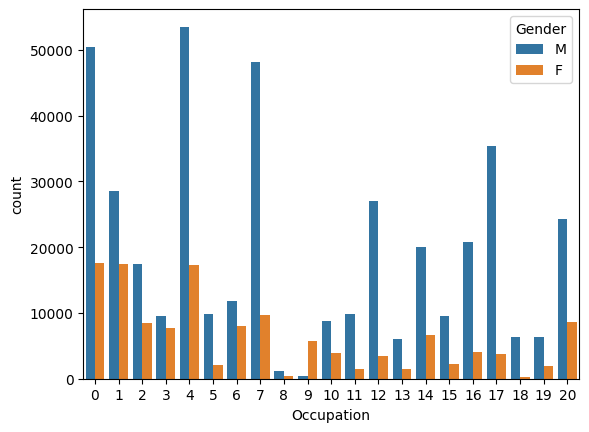

In [51]:
sns.countplot(x='Occupation',hue="Gender",data=df)

<Axes: xlabel='Occupation'>

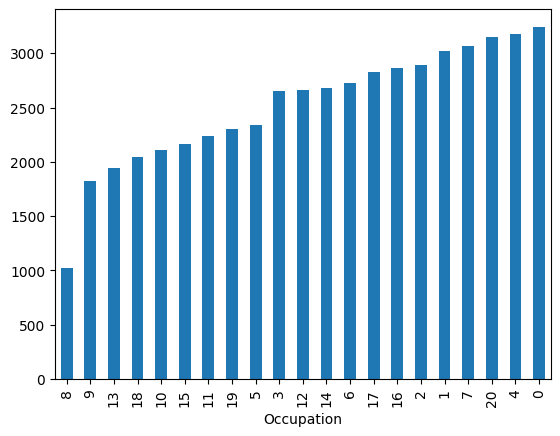

In [63]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

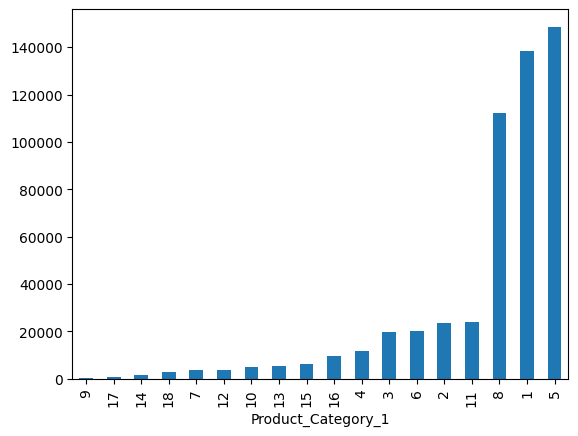

In [71]:
df.groupby('Product_Category_1').size().sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

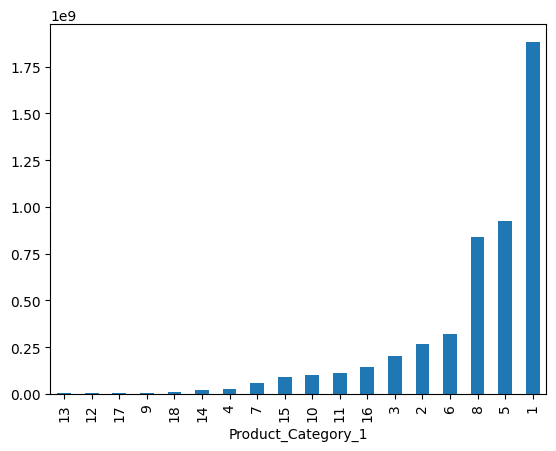

In [77]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

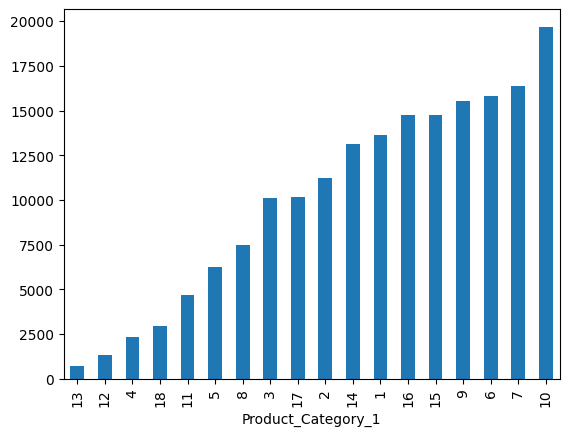

In [75]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

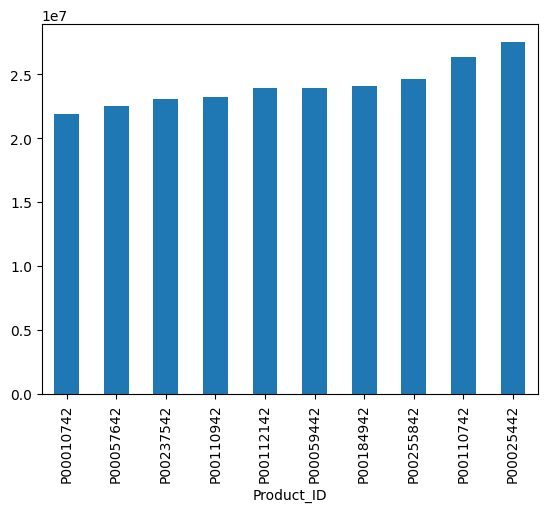

In [82]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

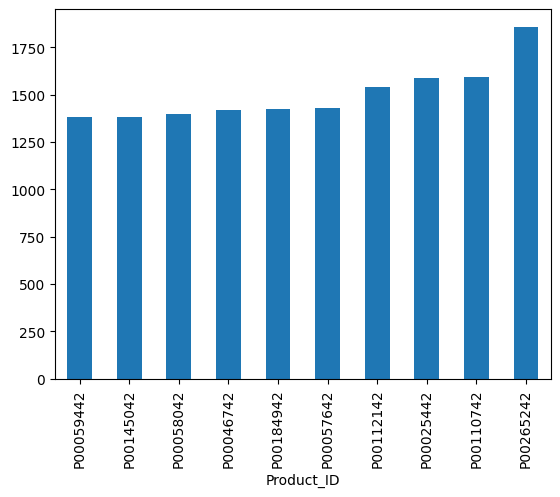

In [84]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

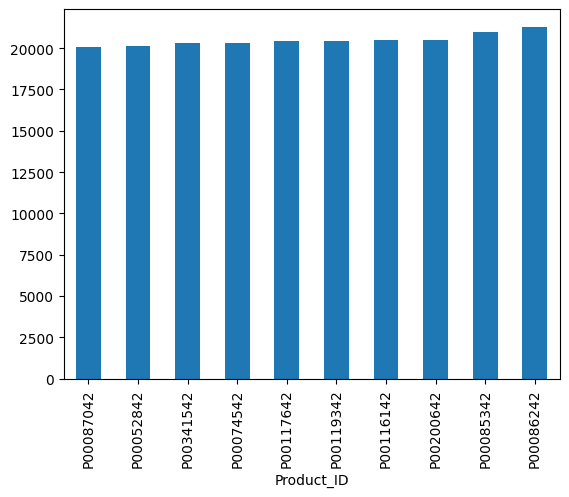

In [88]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1', ylabel='count'>

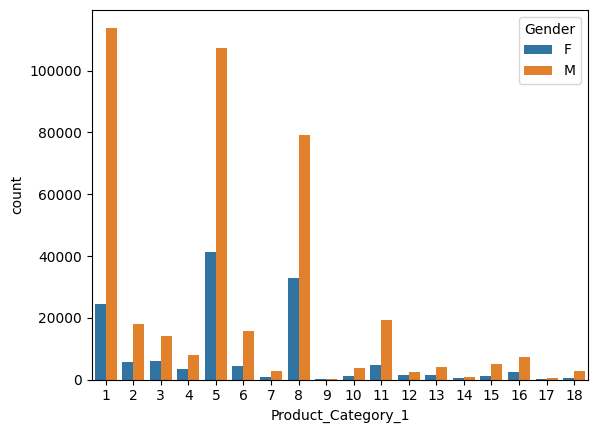

In [92]:
sns.countplot(x='Product_Category_1',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

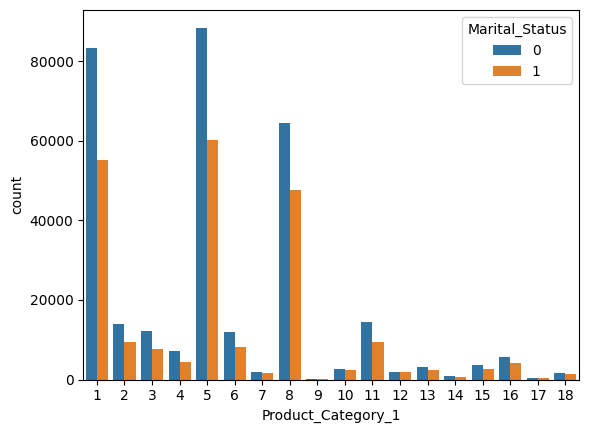

In [96]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data=df)

## Combining Gender & Marital Status

In [127]:
lst=[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['MaritalGender']=lst

In [129]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

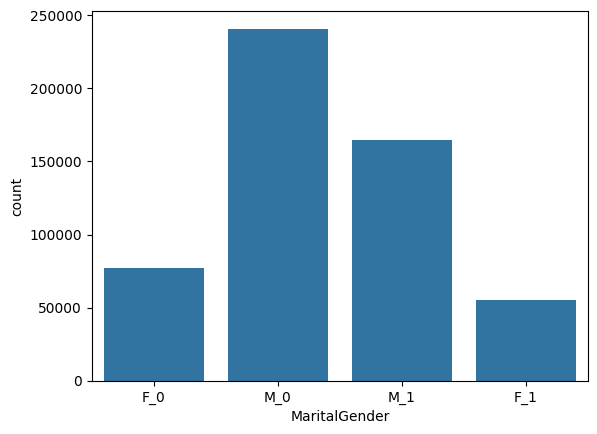

In [133]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

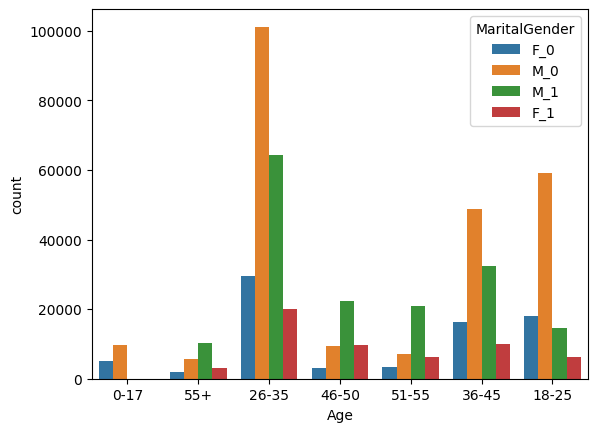

In [135]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

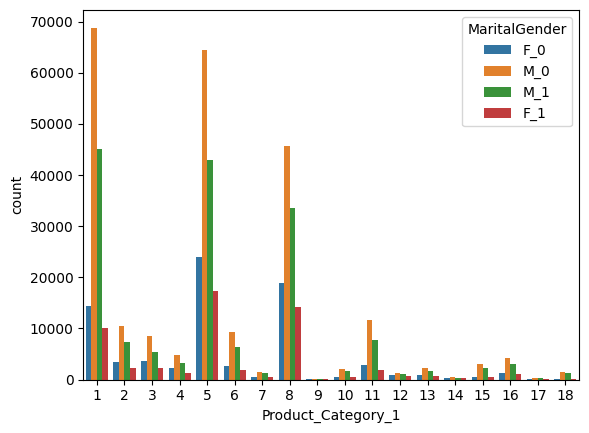

In [137]:
sns.countplot(x=df['Product_Category_1'],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

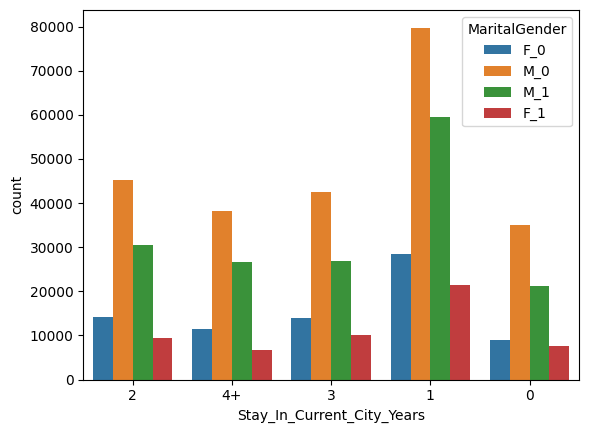

In [139]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

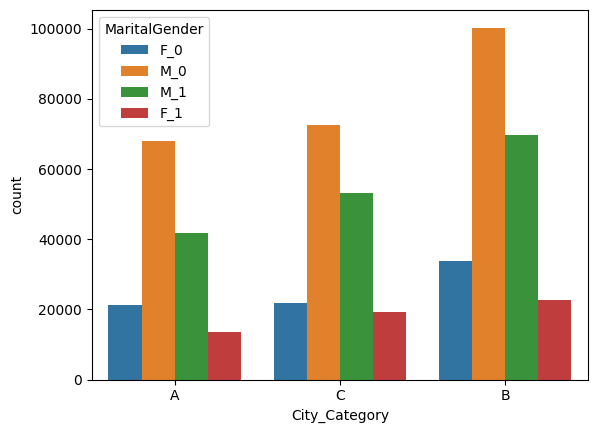

In [141]:
sns.countplot(x=df['City_Category'],hue=df['MaritalGender'])